#### pandas 내장 그래프 도구
- pandas는 matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용시 다른 옵션을 추가하지 않으면 기본적인 선그래프 그릴 수 있다
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind = 'barh',stacked=True,alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y='',kind='scatter') 상관관계를 볼 수 있음
- boxplot : df.plot(kind = 'box') df.boxplot(column = ['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
import matplotlib as plt
- histogram : plt.hist(x,bins='')
- lineplot : plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data,bins='',color='',kde='')
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joiplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg = False)

http://seaborn.pydata.org/

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월일     20 non-null     object
 1   당일종가    20 non-null     int64 
 2   전일종가    20 non-null     int64 
 3   시가      20 non-null     int64 
 4   고가      20 non-null     int64 
 5   저가      20 non-null     int64 
 6   거래량     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [12]:
columns = ['Date','Close','Start','High','Low','Volumn']
df.drop('전일종가',axis=1,inplace = True)
df.columns = columns

In [14]:
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [23]:
# Date를 datetime으로 변경한 수 인덱스로 세팅
df['Date']=pd.to_datetime(df.Date)
df.set_index('Date',inplace = True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [25]:
df.head()

,Close,Start,High,Low,Volumn
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [36]:
# 선그래프
df1 = df[['Close','Start','High','Low']]
df1=df1.sort_index()

<AxesSubplot:xlabel='Date'>

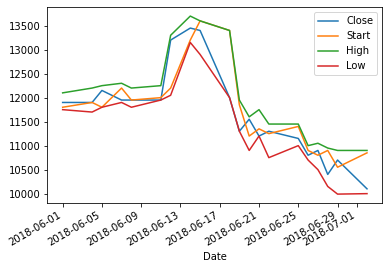

In [37]:
df1.plot()

<AxesSubplot:xlabel='Date'>

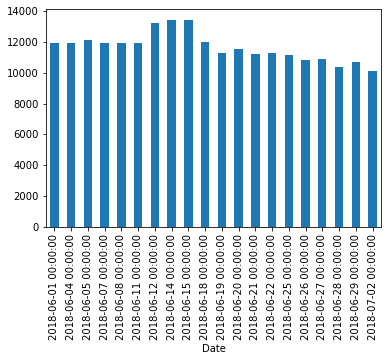

In [38]:
df1.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

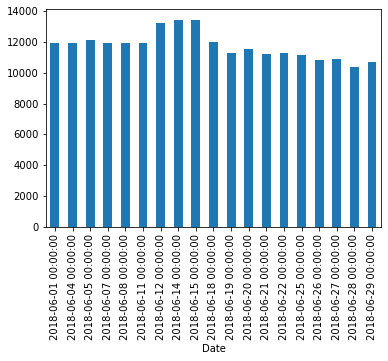

In [42]:
# 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현

df2 = df1.loc[df1.index< '2018-07-01']
df2.Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

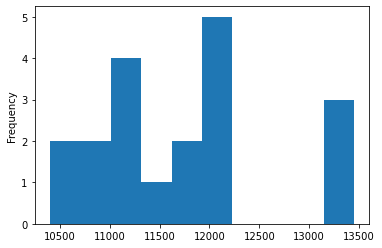

In [48]:
df2.Close.plot(kind = 'hist')

In [49]:
df.rename(columns = {'Volumn':'Volume'},inplace=True)

<AxesSubplot:ylabel='Frequency'>

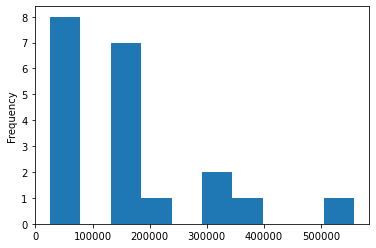

In [50]:
df.Volume.plot(kind='hist')

In [51]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

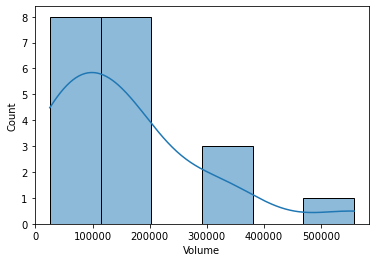

In [52]:
import seaborn as sns
sns.histplot(df.Volume,kde = True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

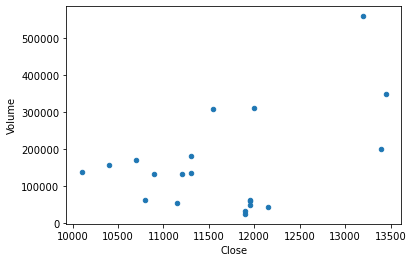

In [54]:
#산점도
df.plot(x='Close',y='Volume',kind = 'scatter')

In [56]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

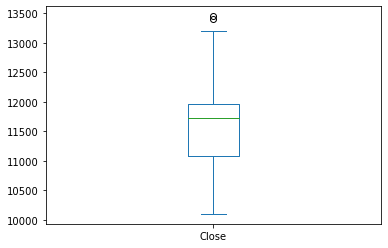

In [55]:
# box plot
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(Inter-Quartile Range) : 제 3사분위수 - 제1사분위수
- lower whisker : Q1 - 1.5 * IQR 이내인 값 중에서 최소값
- upper whisker : Q3 + 1.5 * IQR 이내인 값 중에서 최대값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [69]:
# close 칼럼의 이상치
q1 = df.Close.quantile(.25)
q3 = df.Close.quantile(.75)
irq = q3-q1
df.Close.sort_values(ascending = False)
df.Close.loc[(df.Close>q3 +1.5*irq)|(df.Close<q1 -1.5*irq)]

Date
2018-06-15    13400
2018-06-14    13450
Name: Close, dtype: int64

(array([1., 0., 0., 2., 1., 0., 1., 1., 0., 2., 1., 0., 1., 2., 0., 0., 2.,
        2., 0., 1., 2., 1., 3., 1., 1., 2., 1., 2., 0., 0., 1., 2., 1., 3.,
        0., 0., 0., 2., 2., 1., 2., 1., 0., 0., 1., 1., 0., 1., 1., 1.]),
 array([ 2.  ,  3.08,  4.16,  5.24,  6.32,  7.4 ,  8.48,  9.56, 10.64,
        11.72, 12.8 , 13.88, 14.96, 16.04, 17.12, 18.2 , 19.28, 20.36,
        21.44, 22.52, 23.6 , 24.68, 25.76, 26.84, 27.92, 29.  , 30.08,
        31.16, 32.24, 33.32, 34.4 , 35.48, 36.56, 37.64, 38.72, 39.8 ,
        40.88, 41.96, 43.04, 44.12, 45.2 , 46.28, 47.36, 48.44, 49.52,
        50.6 , 51.68, 52.76, 53.84, 54.92, 56.  ]),
 <BarContainer object of 50 artists>)

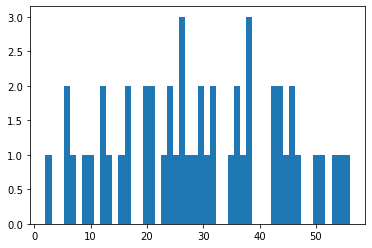

In [73]:
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size = 50)
plt.hist(data,bins=50)

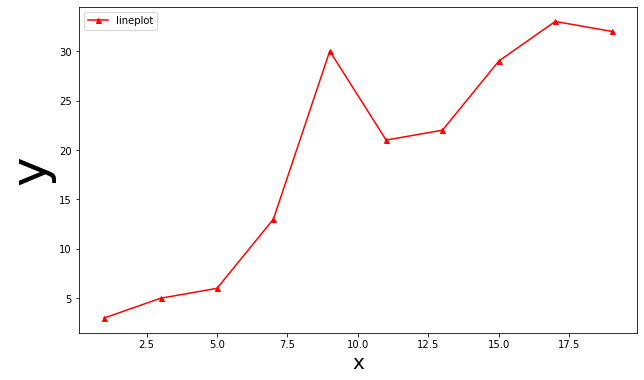

In [90]:
import numpy as np
x= np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(10,6))   # 그래프 크기
plt.plot(x,y,color='red',marker='^',markersize = 5)  #그래프 형식
plt.xlabel('x',size = 20) # x축 형식
plt.ylabel('y',size = 50) # y축 형식
plt.legend(labels=['lineplot']) # 범례

Text(0.5, 1.0, 'Line Graph')

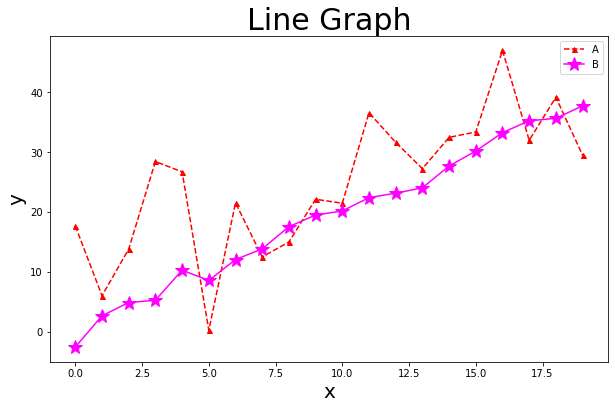

In [102]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2+np.random.randn(20)*10
y2 = np.arange(20)*2+np.random.randn(20)

plt.figure(figsize=(10,6))   # 그래프 크기
plt.plot(x,y1,linestyle = '--',color='red',marker='^',markersize = 5)  #그래프 형식
plt.plot(x,y2,color='magenta',marker='*',markersize = 15)
plt.xlabel('x',size = 20) # x축 형식
plt.ylabel('y',size = 20) # y축 형식
plt.legend(labels=['A','B']) # 범례
plt.title('Line Graph',size = 30)

Text(0.5, 0, 'X')

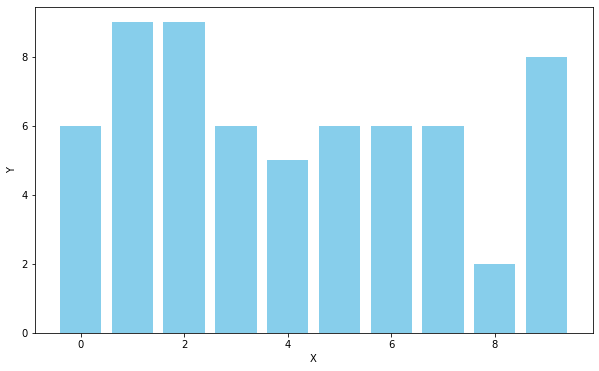

In [104]:
# 막대 그래프

y = np.random.randint(2,10,size = 10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width = 0.8,color ='skyblue')
plt.ylabel('Y')
plt.xlabel('X')


In [105]:
df= pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

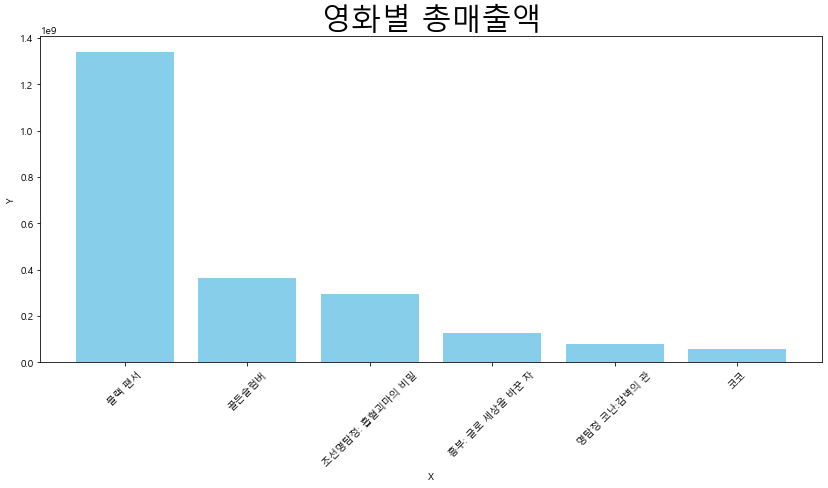

In [117]:
#movie.csv에서 영화명별로 총 매출액을 나타낸 막대그래프를 그린다
import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic') #한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False #마이너스 단위 처리



plt.figure(figsize=(14,6))
plt.bar(df['movieNm'],df['salesAmt'],width = 0.8,color ='skyblue')
plt.title('영화별 총매출액',size = 30)
plt.ylabel('Y')
plt.xlabel('X')
plt.xticks(rotation = 45)

Text(0, 0.5, 'weight')

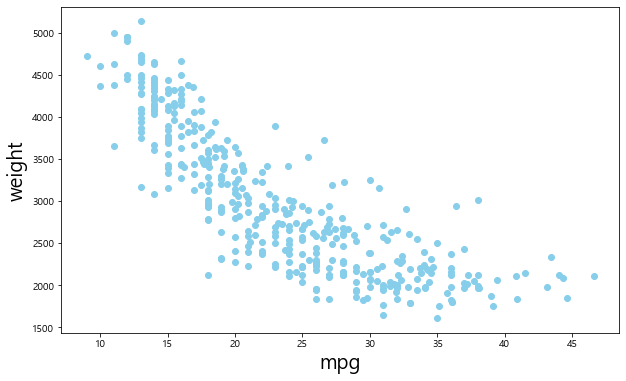

In [120]:
# scatter plot


df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x = df_auto.mpg
y = df_auto.weight

plt.figure(figsize=(10,6))
plt.scatter(x,y,color = 'skyblue')
plt.xlabel('mpg',size = 20)
plt.ylabel('weight',size = 20)

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

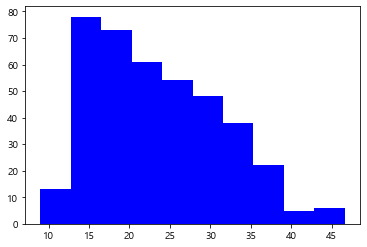

In [121]:
plt.hist(x,bins=10,color='blue')

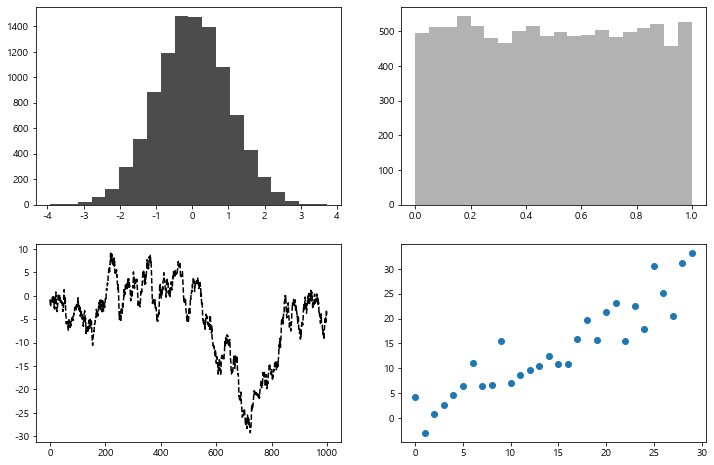

In [132]:
fig = plt.figure(figsize=(12,8))
#figure가 2x2 크기이고 4개의 subplot

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(10000),bins=20,color = 'k',alpha = 0.7)
ax2.hist(np.random.rand(10000),bins=20,color='k',alpha=0.3)
ax3.plot(np.random.randn(1000).cumsum(),'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

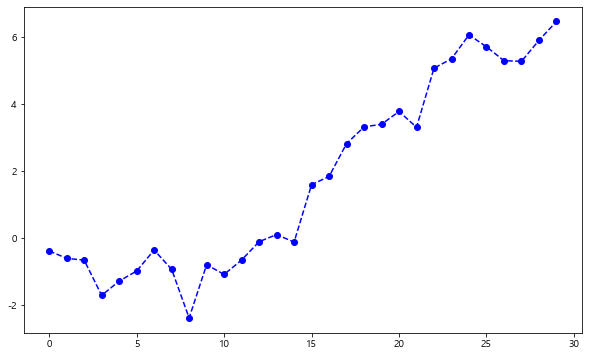

In [133]:
plt.figure(figsize = (10,6))
plt.plot(np.random.randn(30).cumsum(),linestyle = 'dashed', color = 'b', marker='o')

In [149]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [151]:
def age_cat(x):
    cat = ''
    if x <10:
        cat = 'child'
    elif x<20:
        cat = 'teen'
    elif x<30:
        cat = '20s'
    elif x<40:
        cat = '30s'
    elif x<50:
        cat = '40s'
    elif x<60:
        cat = '50s'
    elif x<100:
        cat = 'senior'
    else:
        cat = np.nan
    return cat

t3['age_cat'] = t3.age.apply(lambda x : age_cat(x))
t3[['age','age_cat']]

,age,age_cat
0,29.00,20s
1,0.92,child
2,2.00,child
3,30.00,30s
4,25.00,20s
...,...,...
1304,14.50,teen
1305,NaN,NaN
1306,26.50,20s
1307,27.00,20s


In [152]:
t3.loc[t3['age_cat']=='child']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",child
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",child
339,2,1,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3,0,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN,child
1230,3,0,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S,NaN,NaN,NaN,child
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,16,NaN,NaN,child
1256,3,1,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C,C,NaN,NaN,child


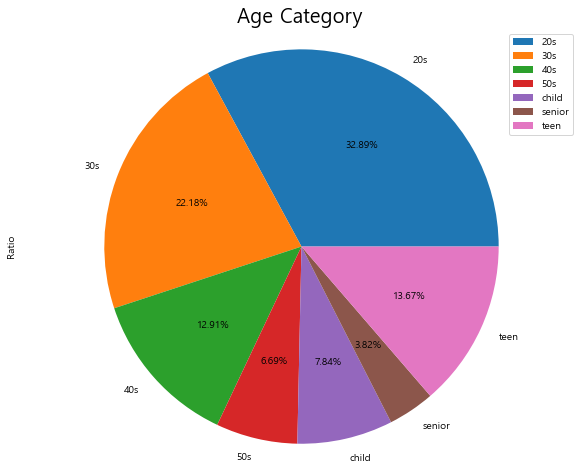

In [148]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',
                     figsize = (10,8),
                     autopct = '%.2f%%',
                     startangle = 0)

plt.title('Age Category',size = 20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
# 물고기 종류 몸길이 데이터 추출
df= pd.read_csv('dataset/4_fm2.csv')

df.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

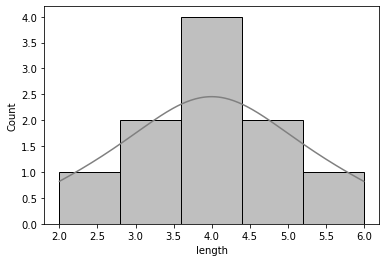

In [7]:
length_a = df.query('species=="A"')['length']
length_b = df.query('species=="b"')['length']

sns.histplot(length_a,color='gray',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

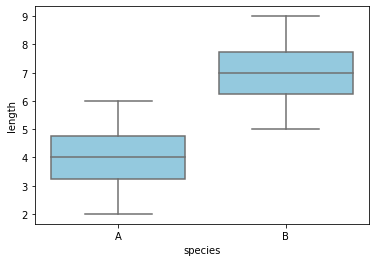

In [8]:
sns.boxplot(x='species',y='length',data =df,color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

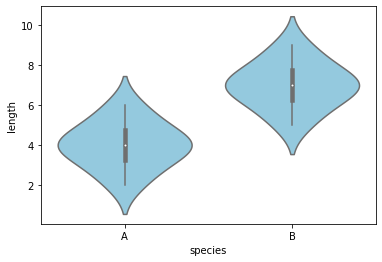

In [9]:
sns.violinplot(x='species',y='length',data =df,color='skyblue')

In [10]:
df1 = df.copy()
df1.iloc[5,1] = 10
df1.iloc[10,1] = 2

<AxesSubplot:xlabel='species', ylabel='length'>

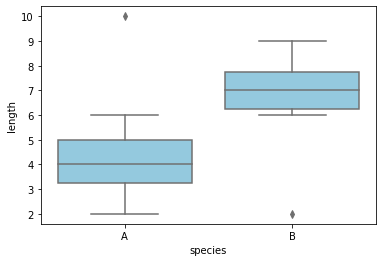

In [11]:
sns.boxplot(x='species',y='length',data =df1,color='skyblue')

In [16]:
# A 이상치
df1A = df1.loc[df1['species'] == 'A']
q1 = df1A.length.quantile(.25)
q3 = df1A.length.quantile(.75)
irq = q3-q1
df1A.length.loc[(df1A.length>q3 +1.5*irq)|(df1A.length<q1 -1.5*irq)]

5    10
Name: length, dtype: int64

In [17]:
df1B = df1.loc[df1['species'] == 'B']
q1 = df1B.length.quantile(.25)
q3 = df1B.length.quantile(.75)
irq = q3-q1
df1B.length.loc[(df1B.length>q3 +1.5*irq)|(df1B.length<q1 -1.5*irq)]

10    2
Name: length, dtype: int64

<AxesSubplot:xlabel='species', ylabel='length'>

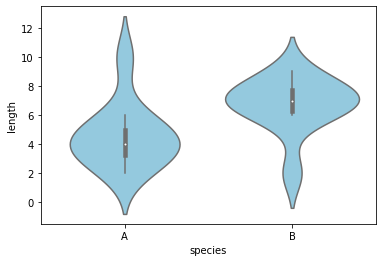

In [12]:
sns.violinplot(x='species',y='length',data =df1,color='skyblue')

In [19]:
cov_df = pd.read_csv('./dataset/4_cov.csv')
cov_df

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


C:\Users\admin\anaconda3\envs\cakd5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


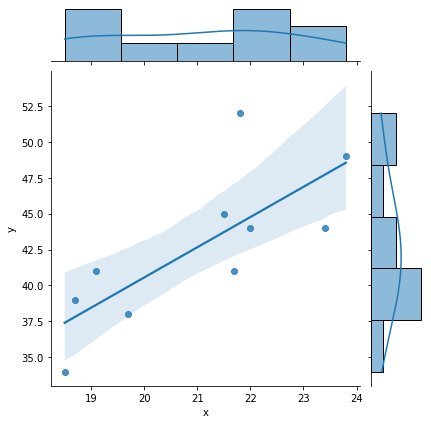

In [20]:
sns.jointplot(cov_df.x,cov_df.y,kind='reg')

In [22]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


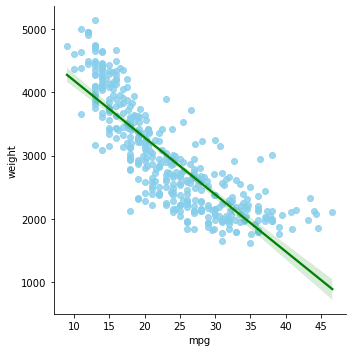

In [23]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws = {'color':'skyblue'},line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

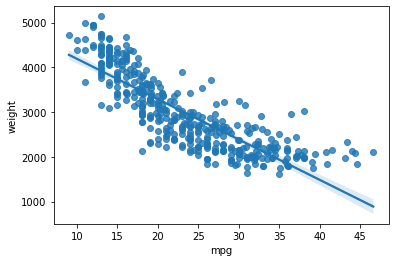

In [25]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

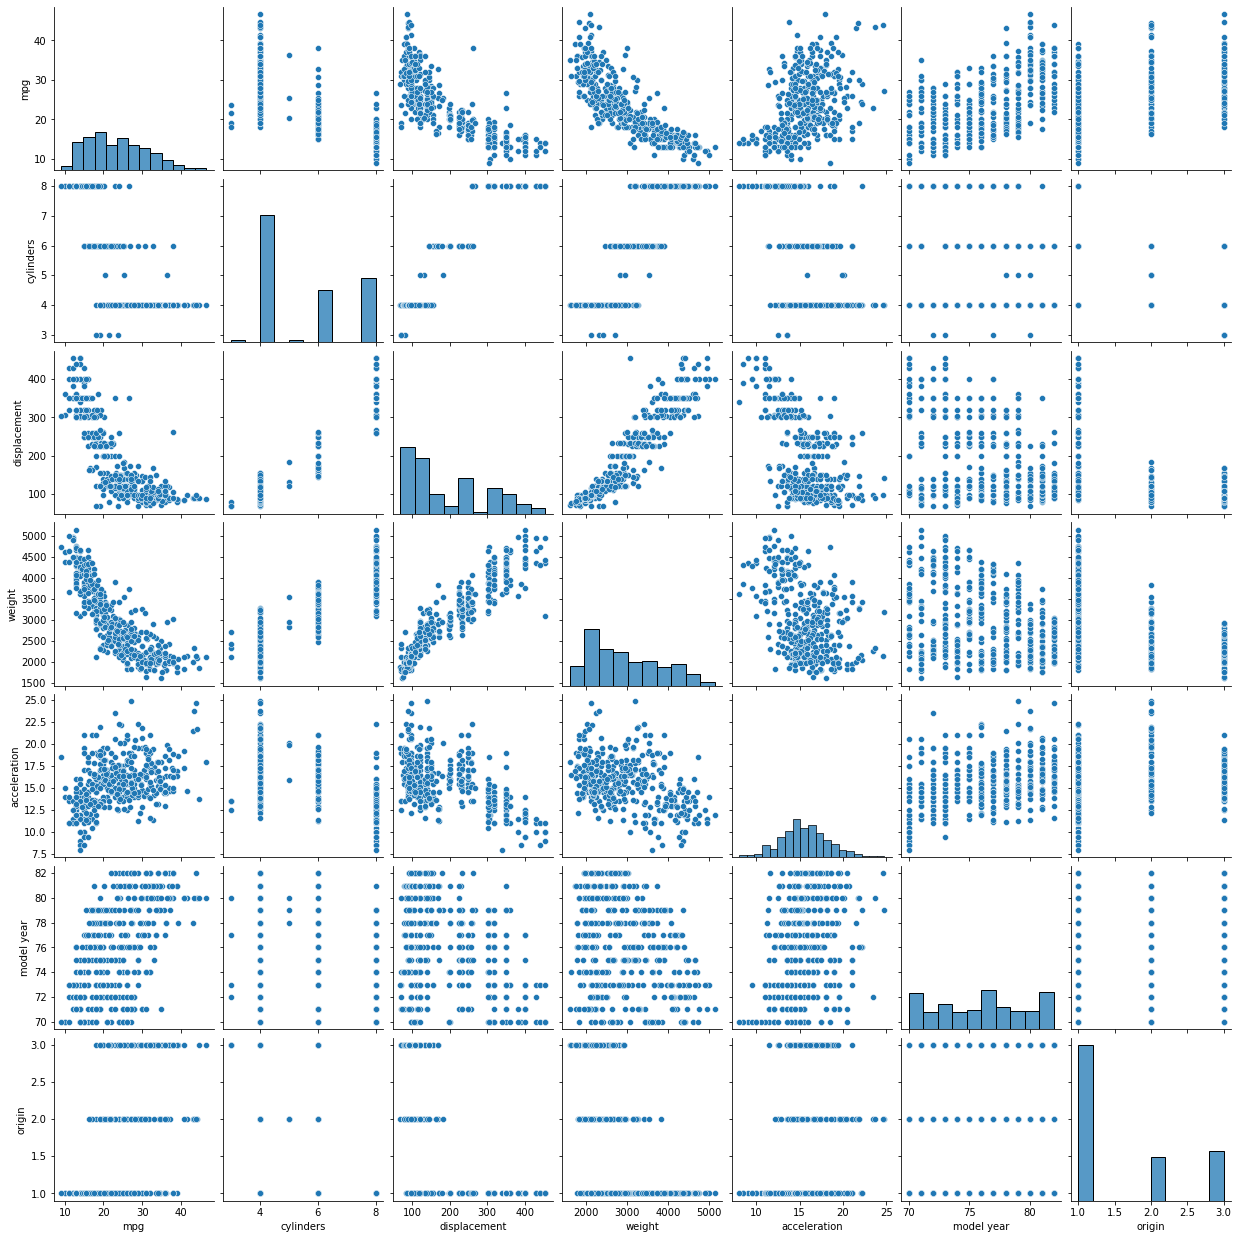

In [26]:
sns.pairplot(df_auto, palette = 'gray')

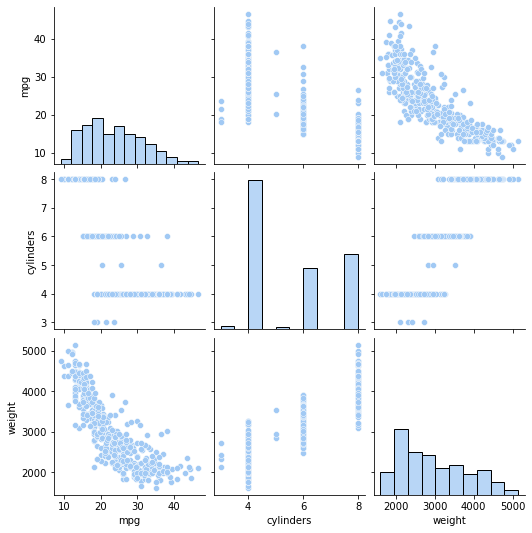

In [30]:
df2 = df_auto[['mpg','cylinders','weight']]
sns.set_palette('pastel')
sns.pairplot(df2,palette = 'gray')

<AxesSubplot:>

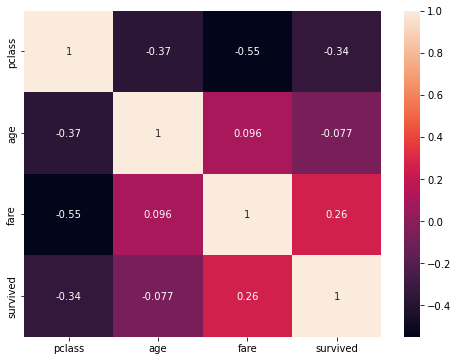

In [35]:
import matplotlib.pyplot as plt

tdf = sns.load_dataset('titanic')
plt.figure(figsize = (8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot = True)


In [36]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values = ['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

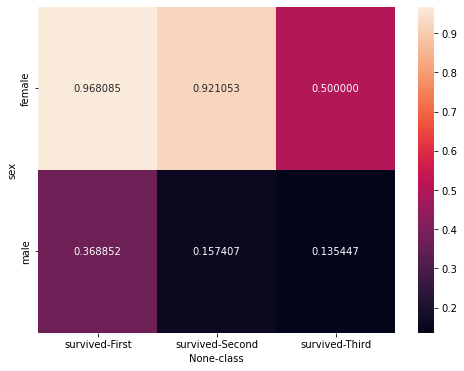

In [40]:
plt.figure(figsize = (8,6))
sns.heatmap(table,annot =True,fmt = 'f')

<AxesSubplot:xlabel='None-class', ylabel='sex'>

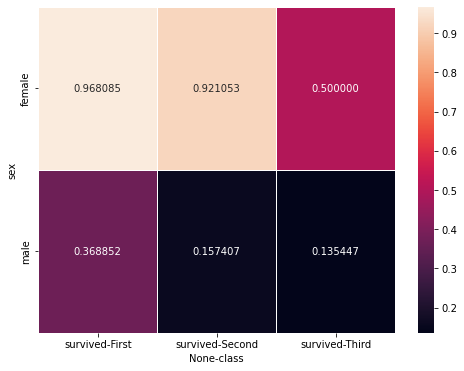

In [43]:
plt.figure(figsize = (8,6))
sns.heatmap(table,
           annot = True,
           fmt = 'f',
            linewidth = .5,
            cbar= True
           )